# 🖼️ Small Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will perform **image classification on small images** using the **CIFAR-10 dataset** available in **TensorFlow Keras datasets**.

The CIFAR-10 dataset consists of **60,000 color images (32×32 pixels)** divided into **10 different classes**, such as airplanes, cars, birds, cats, and more.

We will build and train a **Convolutional Neural Network (CNN)** to learn visual features from the images and perform accurate classification.

---

## 🧠 ANN vs CNN Architecture Comparison

<p align="center">
  <img src="ANN_photo.jpg" alt="ANN Architecture"><br>
  <img src="CNN_photo.jpg"  alt="CNN Architecture">
</p>

<p align="center">
  <em>Left: Artificial Neural Network (ANN) &nbsp;&nbsp;|&nbsp;&nbsp; Right: Convolutional Neural Network (CNN)</em>
</p>


### Explore Data

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape , X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [31]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X,y,index) :
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

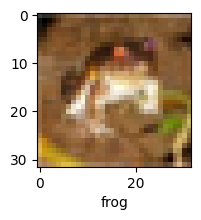

In [32]:
plot_sample(X_train,y_train,0)

### Normalize Data

In [6]:
X_train = X_train / 255
X_test = X_test / 255

### We will begin with **ANN** than we will build a **CNN** than compare

In [9]:
model_ann = models.Sequential([
    #Flatten takes a multi-dimensional array (like an image) and turns it into a 1D vector.
    #Neural networks (Dense/Fully Connected layers) expect 1D input.
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

model_ann.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model_ann.fit(X_train , y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 15s 8ms/step - loss: 1.8185 - accuracy: 0.3500
Epoch 2/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6261 - accuracy: 0.4251
Epoch 3/5
1563/1563 [==============================] - 13s 9ms/step - loss: 1.5429 - accuracy: 0.4573
Epoch 4/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4808 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4327 - accuracy: 0.4967


In [10]:
model_ann.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.5368 - accuracy: 0.4482


[1.536835789680481, 0.448199987411499]

### we can see that **ANN** model is performing bad

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model_ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.58      0.56      1000
           1       0.75      0.38      0.51      1000
           2       0.35      0.46      0.40      1000
           3       0.26      0.38      0.31      1000
           4       0.52      0.24      0.32      1000
           5       0.28      0.54      0.37      1000
           6       0.65      0.27      0.38      1000
           7       0.52      0.56      0.54      1000
           8       0.62      0.58      0.60      1000
           9       0.60      0.49      0.54      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.45     10000
weighted avg       0.51      0.45      0.45     10000



### Now we will see **CNN**

In [16]:
model_cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),# it means it can detect/filter 32 features/patterns
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),# it means it can detect/filter 32 features/patterns
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [17]:
model_cnn.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

In [18]:
model_cnn.fit(X_train , y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 11ms/step - loss: 2.0131 - accuracy: 0.2714
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5958 - accuracy: 0.4268
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4226 - accuracy: 0.4910
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3165 - accuracy: 0.5315
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2365 - accuracy: 0.5646
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1646 - accuracy: 0.5913
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1051 - accuracy: 0.6143
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0520 - accuracy: 0.6328
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0068 - accuracy: 0.6509
Epoch 10/10
1563/1563 [==============================] - 16s 10ms/ste

### 📈 Model Performance and Observations

**With CNN, at the end 5 epochs, accuracy was at around **66%** which is a significant improvement over ANN.**  
**CNN's are best for image classification and gives superb accuracy.**  
**Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features.**


In [19]:
model_cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.0275 - accuracy: 0.6420


[1.0274842977523804, 0.6420000195503235]

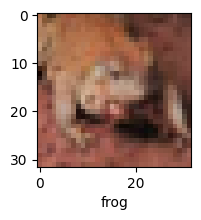

In [33]:
y_test = y_test.reshape(-1,)
plot_sample(X_test,y_test,5)

In [35]:
y_pred = model_cnn.predict(X_test)
np.argmax(y_pred[5])

313/313 [==============================] - 2s 5ms/step


6

In [37]:
y_classes = [np.argmax(element) for element in y_pred] 
y_classes[:5] , y_test[:5]

([3, 8, 8, 0, 4], array([3, 8, 8, 0, 6], dtype=uint8))

In [40]:
 print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.76      0.69      1000
           1       0.80      0.66      0.73      1000
           2       0.45      0.60      0.52      1000
           3       0.47      0.50      0.48      1000
           4       0.73      0.43      0.54      1000
           5       0.58      0.55      0.56      1000
           6       0.79      0.70      0.74      1000
           7       0.70      0.71      0.70      1000
           8       0.77      0.75      0.76      1000
           9       0.64      0.77      0.70      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000

